In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

In [8]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [10]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

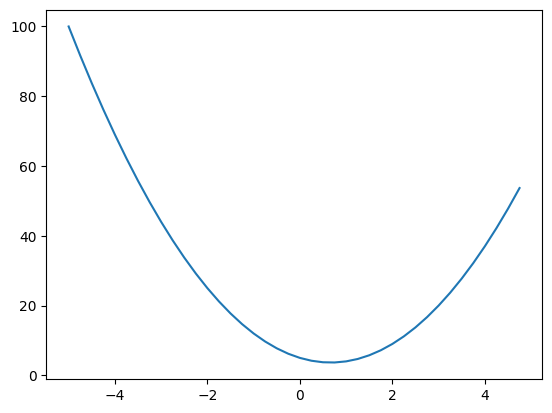

In [11]:
plt.plot(xs, ys)

In [17]:
h = 0.001
x = 3.0
f(x+h)

20.014003000000002

In [18]:
(f(x+h) - f(x))/h

14.00300000000243

In [20]:
h = 0.001
x = -3
(f(x+h) - f(x))/h

-21.996999999998934

In [22]:
h = 0.00000001
x = 2/3
(f(x+h) - f(x))/h

0.0

In [23]:
h = 0.0000001
x = 2/3
(f(x+h) - f(x))/h

2.9753977059954195e-07

In [24]:
#let get more complex 

In [1]:
h = 0.0001

# 3 inputs a, b, c, how result d changes with repest of  
a = 2.0
b=-3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b +c 

print ('d1', d1)
print ('d2', d2)
print ('slope', (d2 - d1)/ h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [4]:
# 3 inputs a, b, c, how result d changes with repest of b

d1 = a*b + c
b += h
d2 = a*b +c 

print ('d1', d1)
print ('d2', d2)
print ('slope', (d2 - d1)/ h)

d1 4.0001
d2 4.0003
slope 2.0000000000042206


In [5]:
# 3 inputs a, b, c, how result d changes with repest of c

d1 = a*b + c
c += h
d2 = a*b +c 

print ('d1', d1)
print ('d2', d2)
print ('slope', (d2 - d1)/ h)

d1 4.0003
d2 4.0004
slope 0.9999999999976694


In [ ]:
# neural network -> python data structure to maintain the mathematical NN expression 

In [40]:
class Value:
    def __init__(self, data):
        self.data = data
    def __repr__(self):
        return f"Value(data={self.data})" # provide a nicer looking of the BOX class, what's inside
    def __add__(self, other):
        return Value(self.data + other.data)
    def __mul__(self, other):
        return Value(self.data*other.data)

a = Value(2.0) 
a

Value(data=2.0)

In [ ]:
#python double underscore special methods, reserved

In [14]:
class MyClass:
    def __init__(self, value):
        self.value = value
    def __repr__(self):
        return f"MyClass(value={self.value})"
    def __str__(self):
        return f"Value is {self.value}"
obj = MyClass(10)
print(obj)  # Calls __repr__


Value is 10


In [15]:
class MyClass:
    def __init__(self, items):
        self.items = items
    def __len__(self):
        return len(self.items)
obj = MyClass([1, 2, 3])
print(len(obj))  # Calls __len__

3


In [ ]:
class MyClass:
    def __init__(self, value):
        self.value = value
    def __add__(self, other):
        return MyClass(self.value + other.value) # this + here is a typical 2 floting point addition 
obj1 = MyClass(10)
obj2 = MyClass(5)
obj3 = obj1 + obj2  # Calls __add__
print(obj3.value)  # Output: 15

In [ ]:
# finish

In [20]:
b = Value(-3.0);
b

Value(data=-3.0)

In [30]:
a + b 
# internally, python would call a.__add__(b), the + here is a python symbol, two object addtion 


Value(data=-1.0)

In [35]:
a*b
# internally, python would call a.__mul__(b)

Value(data=-6.0)

In [51]:
c = Value(10.0)
a*b + c 

Value(data=4.0)

In [54]:
d = a*b + c
# internally, d = (a.__mul(b)).__add(c)
d

Value(data=4.0)

In [ ]:
#Now what we are missing is the connected tissue of this expression, we want to keep these expression graphs, 
#we need to keep pointers about what values produce what other values, now update the data structure 

In [157]:
class Value:
    def __init__(self, data, _operands=(), _operator='', label = ''):
        self.data = data
        self._prev = set(_operands) # object involed with self in an operation, __operands are objects participated in the operation
        self._op = _operator
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None 
        # _backwars is called to calculate parents derivatives 
            
    def __repr__(self):
        return f"Value(data={self.data})" # provide a nicer looking of the BOX class, what's inside
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
        
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        # isinstance(other, Value) returns True if other is already a Value object
        # If True: other stays as-is
        # If False: other gets converted to Value(other)
        out = Value(self.data*other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
            return;
        out._backward = _backward
        return out
    
    # o = x^n, do/dx = n*x^(n-1) 
    def __pow__(self, n):
        assert isinstance(n, (int, float)), "only supporting int/float for now"
        x = self.data
        out = Value(x**n, (self, ), f'**{n}')

        def _backward():
            self.grad += n*(x**(n-1)) * out.grad
        out._backward = _backward
        return out

    # def __pow__(self, other):
    #     assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    #     out = Value(self.data**other, (self,), f'**{other}')
    
    #     def _backward():
    #         self.grad += other * (self.data ** (other - 1)) * out.grad
    #     out._backward = _backward
    
    #     return out

    def __radd__(self, other):
        return self + other

    def __neg__(self):
        return self*(-1)

    def __sub__(self, other):
        return self + (-other)
        
    def __rmul__(self, other):
        return self * other
    # Regular multiplication calls __mul__
    # my_object * 5        # calls my_object.__mul__(5)
    
    # Reverse multiplication calls __rmul__  
    # 5 * my_object        # calls my_object.__rmul__(5)


    # self/other, rewrite to self**(-1), 1/self
    def __truediv__(self, other):
        return self*other**(-1)

    # o = e^x, do/dx = e^x 
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        
        def _backward():
            self.grad += out.grad * out.data 
            # math.exp(x) d(out)/d(self) = e^(self) = out.data
            # Chain rule: self.grad += out.grad * (derivative of exp)
        out._backward = _backward
        return out
            
    def backward(self):
        topo = [];
        visited = set();
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
                # topo.append(v) must happens inside of v not in visited, if visited, do not append agian!!!!, pay attention to indentation
        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()



In [ ]:
a = Value(2.0, label = 'a') 
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
d
print(d._prev, d._op)

In [5]:
#make it one layer deeper 
f = Value(-2.0); f.label = 'f'
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [80]:
d._op

'+'

In [79]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [85]:
d._op
d._prev  # why only print out one, instead of two?

{Value(data=-6.0), Value(data=10.0)}

In [82]:
# here is the answer 
In a Jupyter cell, only the last bare expression is displayed. So:

python
Copy
Edit
d._op
d._prev
will only show d._prev. To see both, either:

python
Copy
Edit
print(d._op)
print(d._prev)
# or
d._op, d._prev      # returns a tuple so the single “last value” is that tuple
# or
{"op": d._op, "prev": d._prev}
In a regular .py script, neither line would print anything unless you use print().

SyntaxError: invalid syntax (842462376.py, line 1)

In [72]:
print(Value.__name__)
print(Value.__module__)
print(Value.__dict__)
print(Value.__bases__)

Value
__main__
{'__module__': '__main__', '__init__': <function Value.__init__ at 0x112acf280>, '__repr__': <function Value.__repr__ at 0x112acf310>, '__add__': <function Value.__add__ at 0x112acf3a0>, '__mul__': <function Value.__mul__ at 0x112acf430>, '__dict__': <attribute '__dict__' of 'Value' objects>, '__weakref__': <attribute '__weakref__' of 'Value' objects>, '__doc__': None}
(<class 'object'>,)


In [74]:
# indepth of python Class object 
Every user-defined class in Python automatically gets a bunch of built-ins—some created for the class object itself, and many inherited from object. You can use them before defining anything extra.

Class-level (on the class itself)
Common attributes Python adds when you do class Foo: ...:

Foo.__name__ – the class’s name ("Foo").

Foo.__qualname__ – qualified name (useful for nested classes).

Foo.__module__ – module where it was defined.

Foo.__doc__ – the class docstring (or None).

Foo.__dict__ – mapping of the class namespace (methods, attrs).

Foo.__annotations__ – type hints dict (if any).

Foo.__mro__ – method resolution order (tuple of bases to search).

Foo.__bases__ – base classes.

Foo.__subclasses__() – current subclasses of Foo.

Foo.__init_subclass__ – hook called when subclassing Foo.

Foo.__class__ – the metaclass (usually type).

Instance-level (on objects of the class)
Even if you don’t define anything, instances inherit default behavior from object:

obj.__class__ – the instance’s class.

obj.__dict__ – per-instance attribute storage (unless you use __slots__).

obj.__repr__(), obj.__str__() – default string displays (the “<Foo object at 0x…>” form).

obj.__eq__(), obj.__ne__(), obj.__hash__() – identity-based equality/hash by default.

obj.__getattribute__(), obj.__setattr__(), obj.__delattr__() – attribute access mechanics.

obj.__dir__() – names shown by dir(obj).

obj.__sizeof__(), obj.__reduce__()/__reduce_ex__() – memory/pickling helpers.

Note: If you define __slots__, instances typically won’t have __dict__ unless you explicitly include "__dict__" in __slots__. Similarly for weakrefs with "__weakref__".

SyntaxError: invalid syntax (1617303727.py, line 1)

In [89]:
import sys
print("Kernel Python:", sys.executable)           # sanity check
!{sys.executable} -m pip install -U graphviz

Kernel Python: /Library/Developer/CommandLineTools/usr/bin/python3
Defaulting to user installation because normal site-packages is not writeable


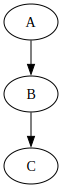

In [6]:
from graphviz import Digraph
g = Digraph(format="svg")
g.edge("A","B"); g.edge("B","C")
g  # should display inline in Jupyter

In [4]:
# graphviz open source, to nicely vitualize 

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

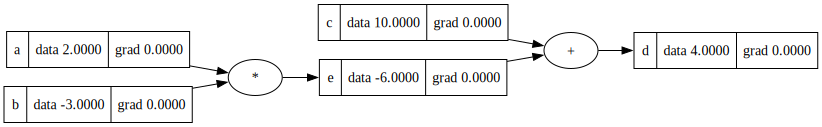

In [8]:
draw_dot(d)

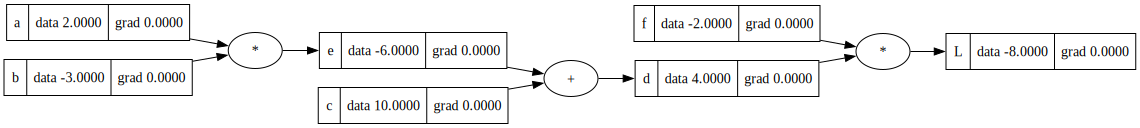

In [49]:
draw_dot(L)

In [134]:
# so far able to 
# 1. build mathmetical expression use * and +, scalar values, 
# 2. graph it as this forward pass, multi inputs: a, b, c, f, 
# the output of this forward pass is -8 
# now run backpropegation manually, start with L, reverse, 
# calculate the gradient along all these interdiate values; 
# computer the derivative of each node with respect to L 

# the derivative of L with repect to L is => dL/dL = (L2-L1)/h = (f(x+h)-f(x))/h = (L+h)- L /h = 1 => when L increase 1, L will change +1
# the derivative of L with repect to f is => dL/df = (L2-L1)/h = (d*(f+h) - d*f)/h = d = 4 => when f increase 1, L will change +4 
# the derivative of L with repect to d is => dL/dd = (L2-L1)/h = ((d+h)*f - d*f)/h = f = -2 => when d increase 1, L will change -2 
# the derivative of L with repect to c is => dL/dc = (dL/dd) * (dd/dc) = -2 * 1 = -2, => when c increase 1, L will change -2
# dd/dc = (d2 - d1)/h = (((c+h) + e)- (c+e)) / h = 1  
# the derivative of L with repect to e is => dL/de = dL/dd * dd/de = -2 * 1 = -2, => when e increase 1, L will change -2
# dd/de = (d2 - d1)/h = ((c+(e+h)) - (c+e)) / h = 1
# the derivative of L with repect to a is => dL/da = dL/dd * dd/de * de/da = -2 * 1 * -3 = 6 => when a increase 1, L will change +6
# de/da = (e2 - e1) / h = ((a+h)*b - a*b) / h = b = -3
# the derivative of L with repect to b is => dL/db = dL/dd * dd/de * de/db = -2 * 1 * 2 = -4 => when b increase 1, L will change -4 
# de/db = (e2 - e1) / h = (a*(b+h) - a*b) / h = a = 2

# these are local derivative, f and d is one step away from L 
# dL/df
# dL/dd

# c and e impact d then impact L, c and e is more than one step away from L, how to write the impact of c on L? Chain Rule 
# dL/dc
# dL/de

# if cars travels twice as fast as bicycle,
# bicycle is four times as fast as walking man
# the car travels ? times as fast as the walking man?

# c = 2b, c/b = 2
# b = 4m, b/m = 4
# so 
# X = c/m = (c/b) * (b/m) = 2 * 4 = 8


In [ ]:
# create a variable to represent the derivate of Loss function with repect to that Value, which we name is as gradient(grad)
# updated Class Value, added self.grad = 0.0, by default, nodes has no impact on the loss function 

In [159]:
# create a gating function, to avoid pullute or mess up global scope, create a little staging area, in python, make all vars to be local var to the LOL function 
def lol():
    h = 0.001
    
    a = Value(2.0, label = 'a') 
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0); f.label = 'f'
    L = d * f; L.label = 'L'

    L1 = L.data

    a = Value(2.0, label = 'a')
    # a = Value(2.0 + h, label = 'a')  # a increase 0.001
    b = Value(-3.0, label = 'b')  # b increase 0.001
    c = Value(10.0, label = 'c')  # c increase 0.001
    e = a*b; e.label = 'e'
    # e.data += h
    d = e + c; d.label = 'd'
    # d.data += h
    f = Value(-2.0); f.label = 'f'  # f increase 0.001
    L = d * f; L.label = 'L'

    L2 = L.data

    # print out derivative of L with repect of each node
    print ((L2 - L1 ) / h)  

    # numerically verify devrivative of L with repect of each node, inline gradient check, 
    # deriving derivative of L with repect of all intermediate results  
    # numerical gradiant is just estimate it using small step size:
    # nudging node by h, see what happens to L 
    
    # dL/dL = 1.000000000000334, when h = 0.001; dL/dL = 0.9999999999976694, when h = 0.0001
    # dL/da = 6.000000000000227, when h = 0.001;
    # dL/db = -3.9999999999995595, when h = 0.001; 
    # dL/dc = -1.9999999999988916, when h = 0.001;
    # dL/dd = -2.000000000000668, when h = 0.001;
    # dL/de = -2.000000000000668, when h = 0.001;
    # dL/df = 3.9999999999995595, when h = 0.001;

lol()

0.0


In [161]:
# manually update each Value object with Grad number 
a.grad = 6.0
b.grad = -4.0
c.grad = -2.0
d.grad = -2.0
e.grad = -2.0
f.grad = 4.0

# manual back propergation all the way from L to leaf nodes: a and b 
# we just iterate through all the nodes, one by one, and locally apply the chain rule, 
# we always know what the derivate of L with repect of this little output, we look at how this output is produced, 
# this output was produced through some operation, and we have the points to these childern nodes of this operation
# in this operation, we know the local derivates are, and we just multiply them, onto the derivative always, 

# back propergation is: recrusively multiply on the local derivatives => recursively application of chain rule, 
# backwards through the computation graph

In [166]:
# lets see the power of back propergation 
# we want to make L go up, how can we nudge our inputs?

# intuitively, a should increase, b should decrease, c, d, e all decrease, f increase 

# how to use mathmetically language to reperesent our intuition?
# a.data = a.data + 0.01
# b.data = b.data - 0.01
# c.data = c.data - 0.01


# generalize this into: (we pick node a, b, c, f, because they are leaf node, we usually have control over them )
a.data += 0.01*(a.grad)
b.data += 0.01*(b.grad)
c.data += 0.01*(c.grad)
f.data += 0.01*(f.grad)

e = a*b; 
d = e + c; 
L = d*f
print(L.data)

-4.572000000000001


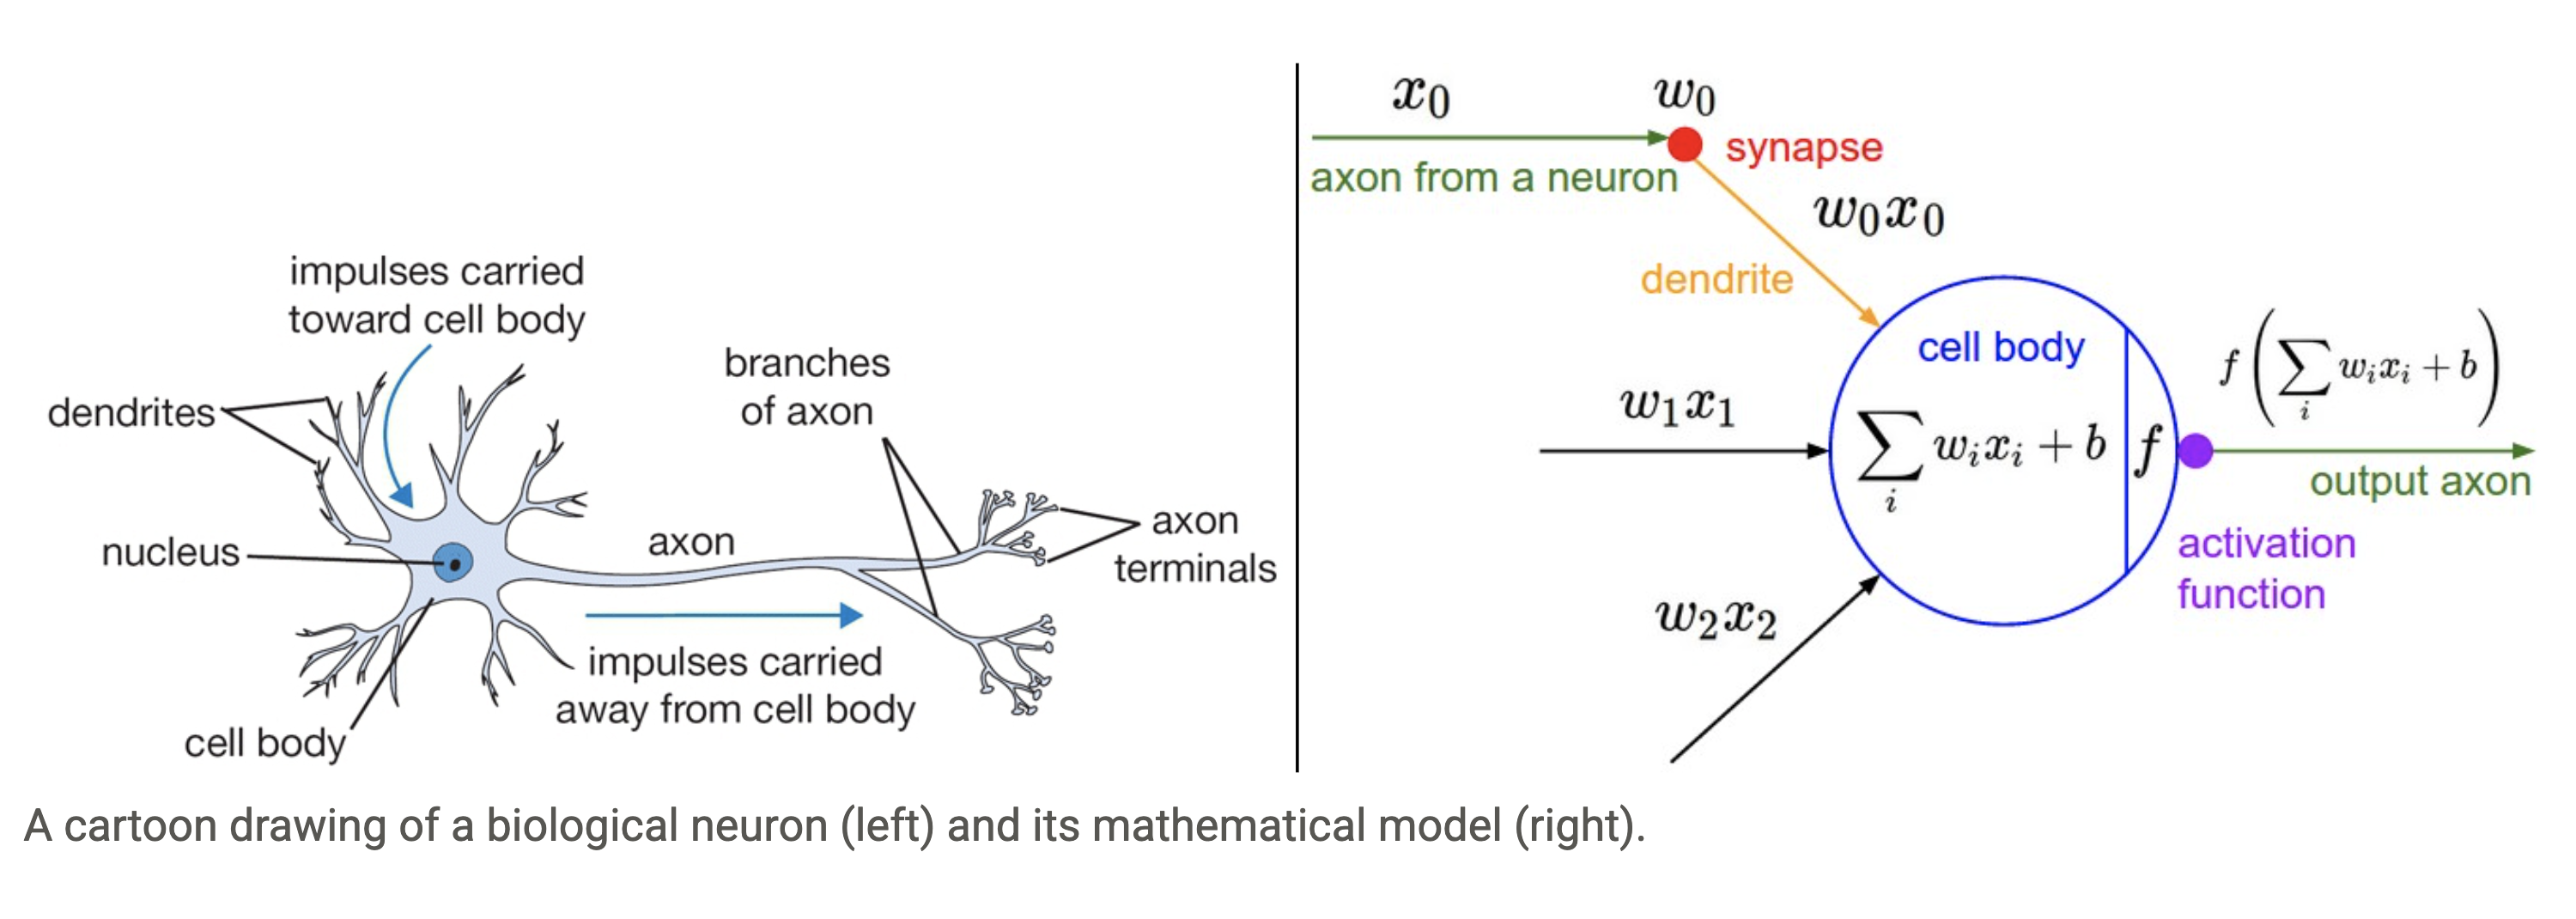

In [ ]:
# back propergate through a neuron

# neuron networks, in the simplest case, these are multilateral perceptrons, diff layer, neurons are fully connected to each other 
# biologically neurons are very complicated devices, but we have very simple mathematical models of them. 

# some inputs axis(X0), then synapses that has weights on them(W0), 
# the synapse interact with the input to this neuron multiplicatively 
# so what flows to the cell body of this neuron is W0 * X0

# b is the innate of trigger happiness of this neuron, ?
# so this bias can make it a bit more trigger happy, or a bit less trigger happy, regardless of the input 
# take all the w and b into activation function, some sort of squashig function, like sigmod, tanh 
# output axon, is the activation function applied to the dot product of weights and inputs 


# (It is possible to introduce neural networks without appealing to brain analogies. )

plt.plot(np.arange(-5, 5, 0.2), np.arange(-5, 5, 0.2)); plt.grid()

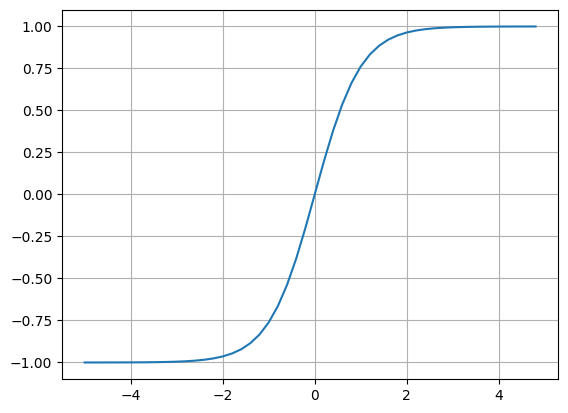

In [180]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5,5, 0.2))); plt.grid()

# tanh activation function: 

# the same input x, y get sqaushed
# at 0 we get 0
# as input go more positive, y will only go up to 1, and then plateau out, cap the result of the function smoothly to 1
# as input go negative, y get cap smoothly to -1


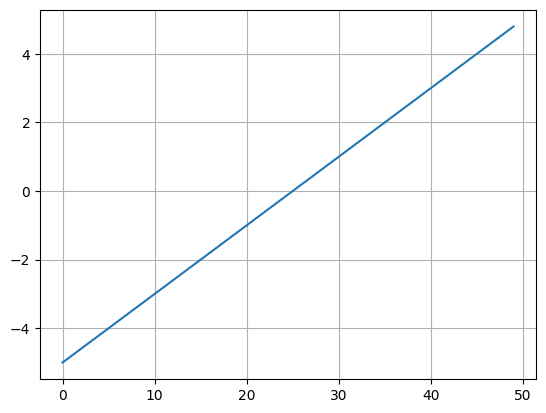

In [177]:
# play with plt.plot 
y = np.arange(-5, 5, 0.2)
plt.plot(y); 
plt.grid()

In [88]:
# inputs: x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights: w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value( 100, label='b')  
#change to 8, will see tanh really impact on n.data
#change to 6.7, not much impact
#change to 6.8813735870195432, ensure when we start backpropergation, no creazy numbers 

# calculation steps 
w1x1 = w1*x1; w1x1.label = 'w1x1'
w2x2 = w2*x2; w2x2.label = 'w2x2'

w1x1w2x2 = w1x1 + w2x2; w1x1w2x2.label ='w1x1 + w2x2'

# final simple raw neuron without activation
n = w1x1w2x2 + b; n.label = 'n'

print ('n is: ', n.data)

o = n.tanh(); o.label = 'o'

print ('o is: ', o.data)


n is:  94.0
o is:  1.0


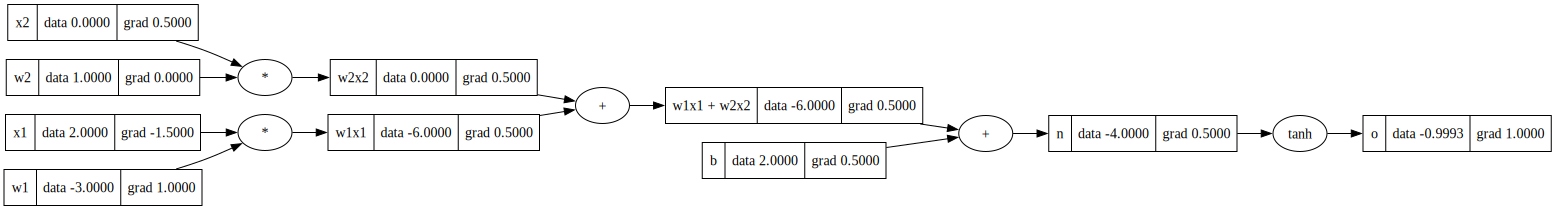

In [48]:
draw_dot(o)

In [ ]:
# derivative of o with repect of o is 1, do/do = (do2-do1)/h = (o+h) - o/h = 1
# derivative of o with repect of n is: do/dn = (do2-do1)/h = (tanh(n+h) - tanh(n))/h = ? check the wiki for answer 

# https://en.wikipedia.org/wiki/Hyperbolic_functions: 

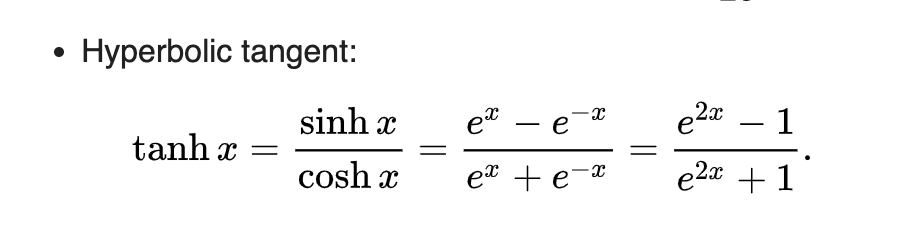

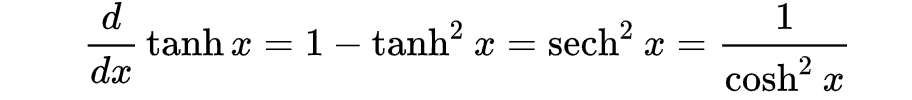

In [ ]:
# x = n 
# tanh(x) = o

# o = sinhn/coshn = math.exp(2*x)-1)/ (math.exp(2*x)+1)

# o.grad = 1.0
# n.grad = do/dn = (tanh(n+h) - tanh(n))/h = 1- tanh(n)**2 = 1-o**2 = 1-(o.data)**2 = 0.5
# b.grad = do/db = do/dn # plus keep the same drivative of the previous step
# 

In [42]:
# x2.grad = do/dx2 = do/dn * dn/dw1x1w2x2 * dw1x1w2x2/dw2x2 * dw2x2/dx2  =  0.5*1*1*1 = 0.5
# w1.grad = do/dw1 = do/dn * dn/dw1x1w2x2 * dw1x1w2x2/dw1x1 * dw1x1/dw1 =  0.5*1*1*2 = 1
# w2.grad = do/dw2 = do/dn * dn/dw1x1w2x2 * dw1x1w2x2/dw2x2 * dw2x2/dw2 =  0.5*1*1*0 = 0
# x1.grad = do/dx1 = do/dn * dn/dw1x1w2x2 * dw1x1w2x2/dw1x1 * dw1x1/dx1 =  0.5*1*1*(-3) = -1.5
# dw1x1/dw1 = 2
# dw1x1/dx1 = -3
# dw1x1/dx2 = 1
# dw1x1/dw2 = 0

# x2.grad = w2.data * x2w2.grad ???? local piece of chain rule 
# x1.grad = w1.data * x1w1.grad ???? local piece of chain rule 
# w2.grad = x1.data * 21w2.grad ???? local piece of chain rule 
# w1.grad = x2.data * x1w1.grad ???? local piece of chain rule 

x1.grad = -1.5
x2.grad = 0.5
w1.grad = 1
w2.grad = 0

In [43]:
w1x1.grad = 0.5
w2x2.grad = 0.5

In [44]:
w1x1w2x2.grad = 0.5

In [45]:
b.grad = 0.5

In [46]:
n.grad = 0.5

In [47]:
o.grad = 1.0

In [ ]:
# now update the grads and re-render the neuron graph 
# done

In [ ]:
# put an end to the suffering of doing backpropergation manually now!!!
# how to do it automatically?????

# hint: use the local chain rule
# derivative of parents nodes has two relationship with the output node 
# + or -, derivative of parent nodes = 1 * out.grad, 
#       (+ drivative is 1,  doesn't matter how parent change, dself/dparent = 1, then chain it, dout/dself )
# * or /, drivative of parent nodes = other.data * out.grad, 
#       (* derivative is other.data, tanh is * as well, use other.data ) tanh is * as well, but it's useing self.data
#     how tanh change the data? why it change the data, what is diff * vs tanh ？

# ALL DERIVATIVE hwo x chagne impact y, one coordinate plane is good enough to show all the relationship in between the two 
# y = 1 (0)
# y = x (1), stright line, slope always is 1, 1*x 
# y = mx (m), stright line, slope very base on m 
# y = mx + b (m), stright line, slope very base on m 
# y = x**2 (2x), curve line, slope very base on 2x
# y = tanh(x)
# y = 100**(x-1)/x... = find out the derivative, the shape, still inside that plane, find all curve function
# # 

# what is max of derivative? +unlimited 
# what is min of derivative? 0, -unlimited
# change rate, y = a + b, y = 2a+b, y = -1/2a + b, y = a, y = 2b
# drivative is, 1, 2, -1/2, 3c, 0

# y1 = a + 100

# y2 = a + 100 + h

# (y2-y1)/h = h/h =1, constant result 1, doesn't matter a is what, the slope, is change rate, derivative is constant 

# derivative = y2-y1/x2-x1, change rate, how much y changes over how much x changes, when x is super small

In [ ]:
# A lambda function in Python is a small, anonymous function defined using the lambda keyword, rather than the traditional def keyword. 
# It's often used when you need a quick, one-line function that you don't want to give a name to.

def add(x, y):
    return x + y

the same to:    
add_lambda = lambda x, y: x+y

In [105]:
# inputs: x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights: w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value( 6.8813735870195432, label='b')  
#change to 8, will see tanh really impact on n.data
#change to 6.7, not much impact
#change to 6.8813735870195432, ensure when we start backpropergation, no creazy numbers 

# calculation steps 
w1x1 = w1*x1; w1x1.label = 'w1x1'
w2x2 = w2*x2; w2x2.label = 'w2x2'

w1x1w2x2 = w1x1 + w2x2; w1x1w2x2.label ='w1x1 + w2x2'

# final simple raw neuron without activation
n = w1x1w2x2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'

o.backward()


out.data is:  0.7071067811865476
self.grad in tanh is:  0.4999999999999999


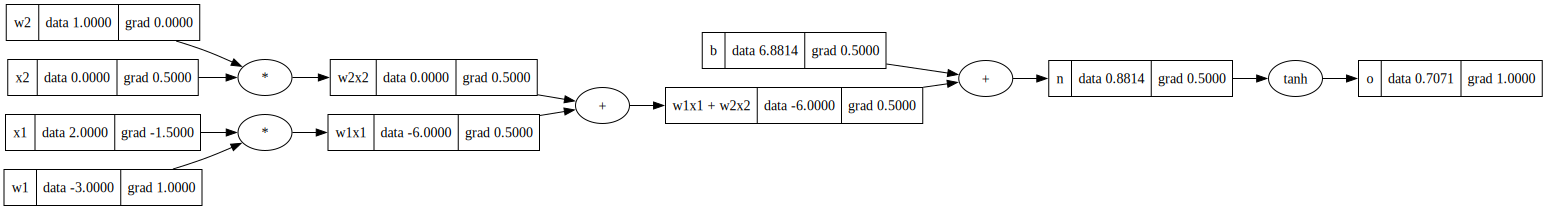

In [99]:
draw_dot(o)

In [76]:
o.grad = 1.0
o._backward()


out.data is:  0.7071067811865476
self.grad in tanh is:  0.4999999999999999


In [ ]:
n._backward()

In [78]:
w1x1w2x2._backward()
b._backward()

In [80]:
w1x1._backward()
w2x2._backward()

self.grad in mul is:  0.9999999999999998
self.grad in mul is:  0.0


In [82]:
w1._backward()
w2._backward()
x1._backward()
x2._backward()

In [98]:
# time to make this calculation of parent nodes derivatives, automatically, instead of call them one by one, try #1

# inputs: x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights: w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value( 6.8813735870195432, label='b')  
#change to 8, will see tanh really impact on n.data
#change to 6.7, not much impact
#change to 6.8813735870195432, ensure when we start backpropergation, no creazy numbers 

steps = [];

# calculation steps 
w1x1 = w1*x1; w1x1.label = 'w1x1'
steps.append(w1x1)

w2x2 = w2*x2; w2x2.label = 'w2x2'

steps.append(w2x2)

w1x1w2x2 = w1x1 + w2x2; w1x1w2x2.label ='w1x1 + w2x2'
steps.append(w1x1w2x2)

# final simple raw neuron without activation
n = w1x1w2x2 + b; n.label = 'n'
steps.append(n)

o = n.tanh(); o.label = 'o'
steps.append(o)

o.grad = 1.0
# here write a function, loop through steps and trigger the _backwards one after another 
for step in reversed(steps):
    step()




out.data is:  0.7071067811865476
self.grad in tanh is:  0.4999999999999999
self.grad in mul is:  0.0
self.grad in mul is:  0.9999999999999998


In [99]:
# Print out the gradients of each step
for step in steps:
    print(step)

Value(data=-6.0)
Value(data=0.0)
Value(data=-6.0)
Value(data=0.8813735870195432)
Value(data=0.7071067811865476)


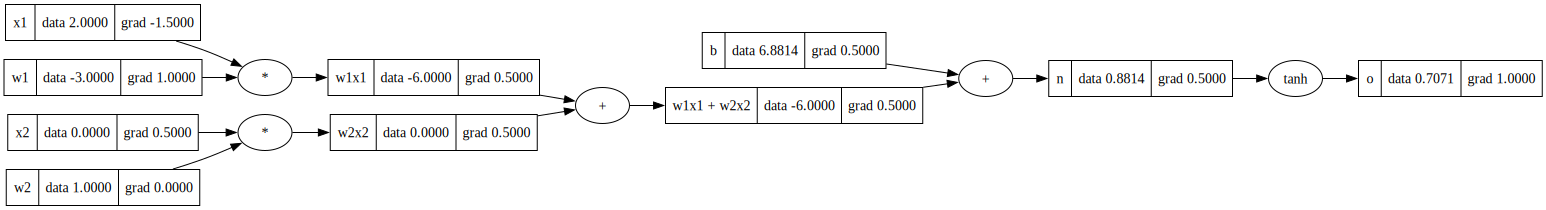

In [96]:
draw_dot(o)

In [25]:
# time to make this calculation of parent nodes derivatives, automatically, instead of call them one by one 
# the store the entire process inside the Value Class, the object is capable to find all its steps by calling one method  

# inputs: x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights: w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value( 6.8813735870195432, label='b')  
#change to 8, will see tanh really impact on n.data
#change to 6.7, not much impact
#change to 6.8813735870195432, ensure when we start backpropergation, no creazy numbers 



# calculation steps 
w1x1 = w1*x1; w1x1.label = 'w1x1'
w2x2 = w2*x2; w2x2.label = 'w2x2'

w1x1w2x2 = w1x1 + w2x2; w1x1w2x2.label ='w1x1 + w2x2'

# final simple raw neuron without activation
n = w1x1w2x2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'



# move this into Value calss 

# build topo graph, 
# topo = [];
# visited = set();
# def build_topo(v):
#     if v not in visited:
#         visited.add(v)
#         for child in v._prev:
#             build_topo(child)
#         topo.append(v)
# build_topo(o)
# topo 

topo

[Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [27]:
# move this into Value calss 
# o.grad = 1.0

# # write a function, loop through nodes and trigger the _backwards one after another 
# for node in reversed(topo):
#     node._backward()

out.data is:  0.7071067811865476
self.grad in tanh is:  0.4999999999999999
self.grad in mul is:  0.0
self.grad in mul is:  0.9999999999999998


In [34]:
# so easy!!!!!!!
o.backward(); 

out.data is:  0.7071067811865476
self.grad in tanh is:  0.4999999999999999
self.grad in mul is:  0.9999999999999998
self.grad in mul is:  0.0


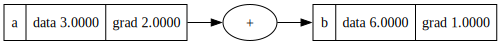

In [43]:
# found a bug

a = Value(3.0, label='a')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b)



In [ ]:
(when take derivaties w.r.t a, involve multi terms, 
result = frist a derivative + second a derivative + ...)

b = a + a; 
db/da = db/da + db/da = 1 + 1 = 2

b = a * a; 

db/da = db/da + db/da = a + a = 2a

b = a * c + a*a 
db/da = db/da + db/da = c + a + a = c + 2a

self.grad in mul is:  1.0
self.grad in mul is:  3.0


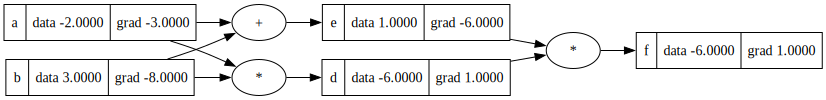

In [44]:
# found a diff bug 

a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a*b; d.label='d'
e = a + b; e.label='e'
f = d*e; f.label='f'
f.backward()

draw_dot(f)

In [ ]:
# accumulate derivaties???  YES
# multivariable chain rule

# df/da = df/dd * dd/da + df/de * de/da = 1*3 + -6*(-6) = 39, can not use chain rule + 

# f = (a*b)*(a+b) = a**2b + ab**2 
# f' = 2*(-2)*3 + 9 = -3


a = -2, b = 3
a+b = 1
a*b = -6
(a+b) * (a*b) = -6

when a increase 1, b the same 
a = -1, b = 3
a +b = 2
a*b = -3
(a+b) * (a*b) = -6

a increase 1, result the same, partial derivative is 0????

when b increase 1, a the same 
a = -2, b = 4
a +b = 2
a*b = -8
(a+b) * (a*b) = -6

b increase 1, result the same, partial derivative of f with respect of b is 0????


# var in multi terms, add derivatives all together
b=a = 1*a, db/da = 1
b=a + a = 1*a + 1*a =1+1 = 2
b = a*a = a + a = 2a
b = a^2 + ac = a*a + ac = 2a + c


In [ ]:
#breaking up tanh, exercising with more expressions

In [59]:
# update Value data strucure to ensure object Value * regular number works
a * 2

Value(data=4.0)

In [62]:
# update Value data strucure to ensure regular number * object Value works
2 * a

Value(data=4.0)

In [66]:
# update Value data strucure to ensure regular number + object Value works
2+a

Value(data=4.0)

In [ ]:
# **************the derivative formula: https://www.cuemath.com/derivative-formula/
# I just get comfortable with + - * /
# here comes the power, omg

In [ ]:
The fact that the derivative of e^x is e^x itself comes from the **definition of e** and can be proven in several ways. Let me show you the most intuitive approach:

## The Key Insight: e is Special

The number e ≈ 2.71828... is **defined** as the unique number where the exponential function has a slope of 1 at x = 0.

## Proof using the definition of derivatives:

**Step 1:** Start with the limit definition of a derivative
```
f'(x) = lim[h→0] (f(x+h) - f(x))/h
```

**Step 2:** Apply this to f(x) = e^x
```
f'(x) = lim[h→0] (e^(x+h) - e^x)/h
```

**Step 3:** Factor out e^x
```
f'(x) = lim[h→0] (e^x · e^h - e^x)/h
f'(x) = lim[h→0] e^x(e^h - 1)/h
f'(x) = e^x · lim[h→0] (e^h - 1)/h
```

**Step 4:** Heres the magic - e is defined such that:
```
lim[h→0] (e^h - 1)/h = 1
```

**Step 5:** Therefore:
```
f'(x) = e^x · 1 = e^x
```

## Why is e special?

The number e is the **only** base where this limit equals 1. For other bases:
- Base 2: the limit ≈ 0.693
- Base 3: the limit ≈ 1.099  
- Base e: the limit = 1 exactly

This is why e appears everywhere in calculus - it makes derivatives incredibly clean!

## Historical note:
This property is actually how mathematicians originally **discovered** and **defined** e. They were looking for a base that would make exponential derivatives simple.

In [69]:
# lim[h→0] (e^h - 1)/h = 1

result = (3**0.0001 - 1) / 0.0001
result

1.0986726383266365

In [ ]:
# **************

python ^ is XOR, integer can not XOR with float
result = (2^0.0001 - 1) / 0.0001, throw error
power vs exponentiation(the operation of raising a number to a power, use exponent notation ^ or **)
2^3(read as "2 to the 3rd power")
x**2(in programming)

Power is either the result of the eponentiation OR the exponent itself(context-dependent)
"2 to the 3rd power", power = the exponent, which is 3
"the power of 2^3 is 8", power = result 
"what's the power of x?", asking for the exponent 

math.exp(x) performs exponentiation where e is raised to the power of x!

In [70]:

result = (2**0.0001 - 1) / 0.0001
result

0.6931712037649973

In [72]:
result = (math.e**0.0001 - 1) / 0.0001
result

1.000050001667141

In [ ]:
# e is a choosen value, 2.71828, to make (e^h - 1)/h = 1, so d(out)/dx = e^x 

In [93]:
a = Value(2.0)
b = Value(4.0)

# a/b
# TypeError: unsupported operand type(s) for /: 'Value' and 'Value'

a*b**(-1)
# TypeError: unsupported operand type(s) for ** or pow(): 'Value' and 'int'
# the naming of the function has to be __pow__, not __power__

# a/b = a* (1/b) = a*b**(-1)


Value(data=0.5)

In [112]:
a-b

Value(data=5.0)

In [113]:
a/b

Value(data=-0.6666666666666666)

In [128]:
# inputs: x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights: w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value( 6.8813735870195432, label='b')  
#change to 8, will see tanh really impact on n.data
#change to 6.7, not much impact
#change to 6.8813735870195432, ensure when we start backpropergation, no creazy numbers 

# calculation steps 
w1x1 = w1*x1; w1x1.label = 'w1x1'
w2x2 = w2*x2; w2x2.label = 'w2x2'

w1x1w2x2 = w1x1 + w2x2; w1x1w2x2.label ='w1x1 + w2x2'

# final simple raw neuron without activation
n = w1x1w2x2 + b; n.label = 'n'
# --------
# update, o.tanh()
# o = math.exp(2*n - 1)/math.exp(2*n + 1)
# to:
e = (2*n).exp(); e.label = 'e'
o = (e - 1)/ (e + 1)
# --------b
o.label = 'o'

o.backward()

In [119]:
e - 1

Value(data=4.828427124746192)

In [120]:
e + 1

Value(data=6.828427124746192)

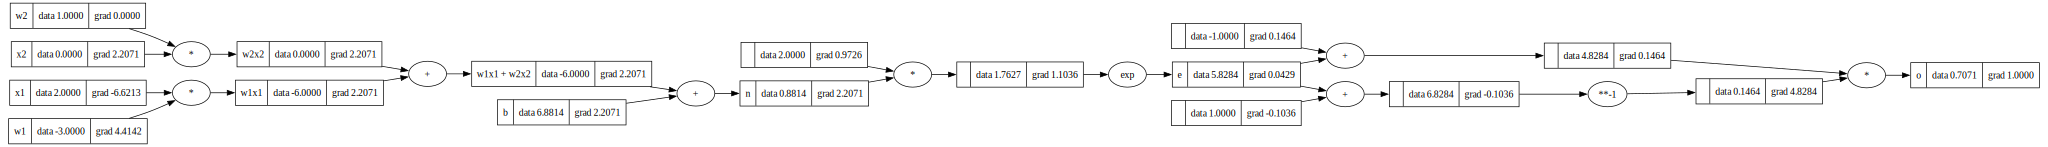

In [129]:
draw_dot(o)

In [130]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out
  
  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    
    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward
    
    return out
  
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()



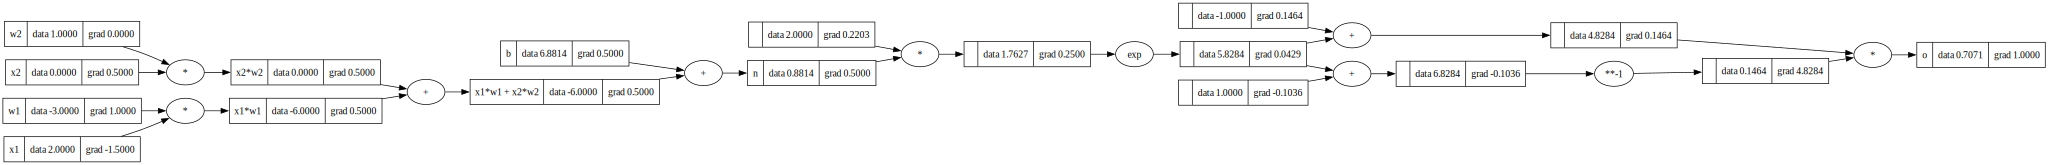

In [158]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ----
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = 'o'
o.backward()
draw_dot(o)